In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [ ]:
# Set data directory path for tremor db
data_dir = Path('/content/drive/MyDrive/Colab Notebooks/master_df.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
master_df = pd.read_csv(data_dir)
display(master_df.head())

,Unnamed: 0,time,tremor_velocity,subject_id,time_off,dbs_condition,medication,side,filename,filepath
0,0,0.000,0.564,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit
1,1,0.001,0.510,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit
2,2,0.002,0.382,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit
3,3,0.003,0.117,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit
4,4,0.004,-0.156,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit


In [ ]:
master_df.isna()

,Unnamed: 0,time,tremor_velocity,subject_id,time_off,dbs_condition,medication,side,filename,filepath
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
677573,False,False,False,False,True,False,False,False,False,False
677574,False,False,False,False,True,False,False,False,False,False
677575,False,False,False,False,True,False,False,False,False,False
677576,False,False,False,False,True,False,False,False,False,False


In [ ]:
data_dir1 = Path('/content/drive/MyDrive/Colab Notebooks/subject_metadata_parsed.csv')
subject_metadata = pd.read_csv(data_dir1)
display(subject_metadata.head())

,Unnamed: 0,subject_id,age_(yrs),gender,stim_target,bi/uni-lateral,eff_freq_(hz),ineff_freq_(hz),intensity_(v),pulse_width_(mu_sec),mode_(cont/cycl),stim_contacts,year_diagnosed,year_dbs_right,year_dbs_left,tot_daily_med_(mg),150%_single_dose_(mg)
0,0,g1,54,M,GPi,Bi,185,90,2.4,90,Cont,---.,1985,1996.0,1996.0,300,150
1,1,g2,52,M,GPi,Uni,160,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
2,2,v3,71,F,Vim,Uni,130,65,3.3,60,Cont,-...,1989,2000.0,1996.0,500,150
3,3,v4,67,M,Vim,Uni,185,60,5.3,90,Cont,..--,1990,1999.0,1999.0,600,300
4,4,v5,40,M,Vim,Uni,135,60,1.3,90,Cont,..--,1999,1999.0,1999.0,1000,300


In [ ]:
# Merge the master_df and subject_metadata DataFrames
merged_df = master_df.merge(subject_metadata, on='subject_id', how='left')

# Examine the merged_df for missing values
print("Missing values in merged_df before handling:")
display(merged_df.isnull().sum())

Missing values in merged_df before handling:


,0
Unnamed: 0_x,0
time,0
tremor_velocity,0
subject_id,0
time_off,368560
dbs_condition,0
medication,0
side,0
filename,0
filepath,0


In [ ]:
# Impute missing values
merged_df['time_off'] = merged_df['time_off'].fillna(-1)
merged_df['year_dbs_right'] = merged_df['year_dbs_right'].fillna(0)
merged_df['year_dbs_left'] = merged_df['year_dbs_left'].fillna(0)

# Display the first few rows and info of the preprocessed merged_df
print("\nMerged DataFrame after handling missing values:")
display(merged_df.head())
print("\nInfo of the merged DataFrame:")
merged_df.info()


Merged DataFrame after handling missing values:


,Unnamed: 0_x,time,tremor_velocity,subject_id,time_off,dbs_condition,medication,side,filename,filepath,...,ineff_freq_(hz),intensity_(v),pulse_width_(mu_sec),mode_(cont/cycl),stim_contacts,year_diagnosed,year_dbs_right,year_dbs_left,tot_daily_med_(mg),150%_single_dose_(mg)
0,0,0.000,0.564,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
1,1,0.001,0.510,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
2,2,0.002,0.382,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
3,3,0.003,0.117,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
4,4,0.004,-0.156,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300



Info of the merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677578 entries, 0 to 677577
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0_x           677578 non-null  int64  
 1   time                   677578 non-null  float64
 2   tremor_velocity        677578 non-null  float64
 3   subject_id             677578 non-null  object 
 4   time_off               677578 non-null  float64
 5   dbs_condition          677578 non-null  object 
 6   medication             677578 non-null  object 
 7   side                   677578 non-null  object 
 8   filename               677578 non-null  object 
 9   filepath               677578 non-null  object 
 10  Unnamed: 0_y           677578 non-null  int64  
 11  age_(yrs)              677578 non-null  int64  
 12  gender                 677578 non-null  object 
 13  stim_target            677578 non-null  object 
 14  bi/un

In [ ]:
numeric_cols = [
    'age_(yrs)',
    'eff_freq_(hz)',
    'ineff_freq_(hz)',
    'intensity_(v)',
    'pulse_width_(mu_sec)',
    'year_diagnosed',
    'year_dbs_right',
    'year_dbs_left',
    'tot_daily_med_(mg)',
    '150%_single_dose_(mg)'
]

for col in numeric_cols:

    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


print("\nMissing values after converting to numeric types:")
display(merged_df.isnull().sum())

print("\nMerged DataFrame after type conversion:")
display(merged_df.head())
print("\nInfo of the merged DataFrame after type conversion:")
merged_df.info()


Missing values after converting to numeric types:


,0
Unnamed: 0_x,0
time,0
tremor_velocity,0
subject_id,0
time_off,0
dbs_condition,0
medication,0
side,0
filename,0
filepath,0



Merged DataFrame after type conversion:


,Unnamed: 0_x,time,tremor_velocity,subject_id,time_off,dbs_condition,medication,side,filename,filepath,...,ineff_freq_(hz),intensity_(v),pulse_width_(mu_sec),mode_(cont/cycl),stim_contacts,year_diagnosed,year_dbs_right,year_dbs_left,tot_daily_med_(mg),150%_single_dose_(mg)
0,0,0.000,0.564,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
1,1,0.001,0.510,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
2,2,0.002,0.382,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
3,3,0.003,0.117,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300
4,4,0.004,-0.156,g2,15.0,off,off,right,tremordb/1.0.0/r15ofh/g2r15of.rit,tremordb/1.0.0/r15ofh/g2r15of.rit,...,60,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300



Info of the merged DataFrame after type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677578 entries, 0 to 677577
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0_x           677578 non-null  int64  
 1   time                   677578 non-null  float64
 2   tremor_velocity        677578 non-null  float64
 3   subject_id             677578 non-null  object 
 4   time_off               677578 non-null  float64
 5   dbs_condition          677578 non-null  object 
 6   medication             677578 non-null  object 
 7   side                   677578 non-null  object 
 8   filename               677578 non-null  object 
 9   filepath               677578 non-null  object 
 10  Unnamed: 0_y           677578 non-null  int64  
 11  age_(yrs)              677578 non-null  int64  
 12  gender                 677578 non-null  object 
 13  stim_target            677578 non-nu

In [ ]:
from scipy.stats import skew, kurtosis
from scipy.signal import welch
import matplotlib.pyplot as plt

def extract_tremor_features(df):

    if df.empty:
        return None

    features = {}

    # Statistical features
    features['mean_velocity'] = df['tremor_velocity'].mean()
    features['median_velocity'] = df['tremor_velocity'].median()
    features['std_velocity'] = df['tremor_velocity'].std()
    features['variance_velocity'] = df['tremor_velocity'].var()
    features['min_velocity'] = df['tremor_velocity'].min()
    features['max_velocity'] = df['tremor_velocity'].max()
    features['range_velocity'] = features['max_velocity'] - features['min_velocity']
    features['skewness_velocity'] = skew(df['tremor_velocity'])
    features['kurtosis_velocity'] = kurtosis(df['tremor_velocity'])
    features['rms_velocity'] = np.sqrt(np.mean(df['tremor_velocity']**2))

    # Frequency-domain features (using Welch's method for PSD)
    try:
        # Assume a constant sampling rate, estimate from time difference
        # Handle potential non-uniform time steps or very short recordings
        if len(df) > 1:
             # Calculate the median time difference
            median_dt = np.median(np.diff(df['time']))
            if median_dt > 0:
                fs = 1.0 / median_dt
            else:
                # Default to 1000 Hz if median_dt is not positive
                fs = 1000.0
        else:
            # Default to 1000 Hz for single data point recordings
            fs = 1000.0

        # Ensure enough data points for Welch's method
        nperseg = min(256, len(df)) # Use at most 256 points, or the length of the data if shorter
        if nperseg < 8: # Welch's method requires at least 8 points by default
             features['dominant_frequency'] = np.nan
             features['peak_psd'] = np.nan
        else:
            freqs, psd = welch(df['tremor_velocity'], fs=fs, nperseg=nperseg)
            # Find the dominant frequency (excluding DC component)
            if len(freqs) > 1:
                dominant_freq_idx = np.argmax(psd[1:]) + 1 # Exclude DC (0 Hz) component
                features['dominant_frequency'] = freqs[dominant_freq_idx]
                features['peak_psd'] = psd[dominant_freq_idx]
            else:
                 features['dominant_frequency'] = np.nan
                 features['peak_psd'] = np.nan

    except Exception as e:
        print(f"Error during PSD calculation for a recording: {e}")
        features['dominant_frequency'] = np.nan
        features['peak_psd'] = np.nan


    return features

# Apply the feature extraction function to each recording (grouped by filename)
# Include relevant metadata columns in the aggregation
metadata_cols = ['subject_id', 'time_off', 'dbs_condition', 'medication', 'side',
                 'age_(yrs)', 'gender', 'stim_target', 'bi/uni-lateral',
                 'eff_freq_(hz)', 'ineff_freq_(hz)', 'intensity_(v)',
                 'pulse_width_(mu_sec)', 'mode_(cont/cycl)', 'stim_contacts',
                 'year_diagnosed', 'year_dbs_right', 'year_dbs_left',
                 'tot_daily_med_(mg)', '150%_single_dose_(mg)']

# Create a list to store the feature dictionaries
feature_list = []

# Group by filename and extract features
for filename, group_df in merged_df.groupby('filename'):
    features = extract_tremor_features(group_df)
    if features is not None:
        # Add metadata from the first row of the group (assuming metadata is constant per file)
        metadata = group_df[metadata_cols].iloc[0].to_dict()
        features.update(metadata)
        features['filename'] = filename # Add filename back as an identifier
        feature_list.append(features)

# Convert the list of feature dictionaries to a DataFrame
feature_df = pd.DataFrame(feature_list)

# Display the first few rows and information of the feature DataFrame
print("Feature DataFrame:")
display(feature_df.head())
print("\nInfo of the Feature DataFrame:")
feature_df.info()

Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation for a recording: 'key of type tuple not found and not a MultiIndex'
Error during PSD calculation f

,mean_velocity,median_velocity,std_velocity,variance_velocity,min_velocity,max_velocity,range_velocity,skewness_velocity,kurtosis_velocity,rms_velocity,...,intensity_(v),pulse_width_(mu_sec),mode_(cont/cycl),stim_contacts,year_diagnosed,year_dbs_right,year_dbs_left,tot_daily_med_(mg),150%_single_dose_(mg),filename
0,0.007591,0.0015,0.419352,0.175856,-0.7620,0.8600,1.622,0.176042,-1.301088,0.419386,...,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300,tremordb/1.0.0/r15ofh/g2r15of.rit
1,-0.007212,-0.0125,0.285701,0.081625,-0.7405,0.8165,1.557,0.087987,-0.713260,0.285772,...,2.0,90,Cycl,.--.,1990,2000.0,2000.0,300,200,tremordb/1.0.0/r15ofh/s6r15of.let
2,-0.065891,-0.1760,0.462554,0.213956,-0.9730,0.8830,1.856,0.199636,-1.422127,0.467197,...,2.8,90,Cont,--..,1990,0.0,0.0,1000,300,tremordb/1.0.0/r15ofh/s8r15of.let
3,0.899258,1.0000,4.103141,16.835766,-23.2500,55.5000,78.750,0.611863,10.469479,4.200201,...,3.7,70,Cont,--..,1975,1995.0,1995.0,900,375,tremordb/1.0.0/r15ofl/g10r15of.let
4,0.487536,0.7500,2.920812,8.531145,-20.8500,57.0000,77.850,1.087537,33.323631,2.960992,...,4.6,90,Cont,.+--,1986,1994.0,1997.0,1200,450,tremordb/1.0.0/r15ofl/g11r15of.let



Info of the Feature DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_velocity          101 non-null    float64
 1   median_velocity        101 non-null    float64
 2   std_velocity           101 non-null    float64
 3   variance_velocity      101 non-null    float64
 4   min_velocity           101 non-null    float64
 5   max_velocity           101 non-null    float64
 6   range_velocity         101 non-null    float64
 7   skewness_velocity      101 non-null    float64
 8   kurtosis_velocity      101 non-null    float64
 9   rms_velocity           101 non-null    float64
 10  dominant_frequency     0 non-null      float64
 11  peak_psd               0 non-null      float64
 12  subject_id             101 non-null    object 
 13  time_off               101 non-null    float64
 14  dbs_condition          101

In [ ]:
from scipy.signal import welch

def extract_tremor_features(df):

    if df.empty:
        return None

    features = {}

    # Statistical features
    features['mean_velocity'] = df['tremor_velocity'].mean()
    features['median_velocity'] = df['tremor_velocity'].median()
    features['std_velocity'] = df['tremor_velocity'].std()
    features['variance_velocity'] = df['tremor_velocity'].var()
    features['min_velocity'] = df['tremor_velocity'].min()
    features['max_velocity'] = df['tremor_velocity'].max()
    features['range_velocity'] = features['max_velocity'] - features['min_velocity']
    features['skewness_velocity'] = skew(df['tremor_velocity'])
    features['kurtosis_velocity'] = kurtosis(df['tremor_velocity'])
    features['rms_velocity'] = np.sqrt(np.mean(df['tremor_velocity']**2))

    # Frequency-domain features (using Welch's method for PSD)
    try:
        # Assume a constant sampling rate, estimate from time difference
        # Handle potential non-uniform time steps or very short recordings
        if len(df) > 1:
             # Calculate the median time difference
            median_dt = np.median(np.diff(df['time']))
            if median_dt > 0:
                fs = 1.0 / median_dt
            else:
                # Default to 1000 Hz if median_dt is not positive
                fs = 1000.0
        else:
            # Default to 1000 Hz for single data point recordings
            fs = 1000.0

        # Ensure enough data points for Welch's method
        # nperseg should be less than or equal to the number of data points
        # A power of 2 is often used, but not strictly necessary for welch
        # Use a smaller nperseg for shorter signals
        nperseg = min(256, len(df) // 2) # Use at most 256, and at most half the signal length
        if nperseg < 8: # Welch's method requires at least 8 points by default
             features['dominant_frequency'] = np.nan
             features['peak_psd'] = np.nan
        else:
            # Ensure the signal is real for rfft which welch uses internally
            tremor_data = df['tremor_velocity'].values.astype(np.float64)

            freqs, psd = welch(tremor_data, fs=fs, nperseg=nperseg)

            # Find the dominant frequency (excluding DC component)
            if len(freqs) > 1 and len(psd) > 1:
                # Find the index of the maximum power in the positive frequency range
                dominant_freq_idx = np.argmax(psd[1:]) + 1 # Exclude DC (0 Hz) component
                features['dominant_frequency'] = freqs[dominant_freq_idx]
                features['peak_psd'] = psd[dominant_freq_idx]
            else:
                 features['dominant_frequency'] = np.nan
                 features['peak_psd'] = np.nan

    except Exception as e:
        print(f"Error during PSD calculation for a recording: {e}")
        features['dominant_frequency'] = np.nan
        features['peak_psd'] = np.nan


    return features

# Apply the feature extraction function to each recording (grouped by filename)
# Include relevant metadata columns in the aggregation
metadata_cols = ['subject_id', 'time_off', 'dbs_condition', 'medication', 'side',
                 'age_(yrs)', 'gender', 'stim_target', 'bi/uni-lateral',
                 'eff_freq_(hz)', 'ineff_freq_(hz)', 'intensity_(v)',
                 'pulse_width_(mu_sec)', 'mode_(cont/cycl)', 'stim_contacts',
                 'year_diagnosed', 'year_dbs_right', 'year_dbs_left',
                 'tot_daily_med_(mg)', '150%_single_dose_(mg)']

# Create a list to store the feature dictionaries
feature_list = []

# Group by filename and extract features
for filename, group_df in merged_df.groupby('filename'):
    features = extract_tremor_features(group_df)
    if features is not None:
        # Add metadata from the first row of the group (assuming metadata is constant per file)
        metadata = group_df[metadata_cols].iloc[0].to_dict()
        features.update(metadata)
        features['filename'] = filename # Add filename back as an identifier
        feature_list.append(features)

# Convert the list of feature dictionaries to a DataFrame
feature_df = pd.DataFrame(feature_list)

# Display the first few rows and information of the feature DataFrame
print("Feature DataFrame:")
display(feature_df.head())
print("\nInfo of the Feature DataFrame:")
feature_df.info()

Feature DataFrame:


,mean_velocity,median_velocity,std_velocity,variance_velocity,min_velocity,max_velocity,range_velocity,skewness_velocity,kurtosis_velocity,rms_velocity,...,intensity_(v),pulse_width_(mu_sec),mode_(cont/cycl),stim_contacts,year_diagnosed,year_dbs_right,year_dbs_left,tot_daily_med_(mg),150%_single_dose_(mg),filename
0,0.007591,0.0015,0.419352,0.175856,-0.7620,0.8600,1.622,0.176042,-1.301088,0.419386,...,3.7,120,Cycl,-...,1985,1993.0,1994.0,1100,300,tremordb/1.0.0/r15ofh/g2r15of.rit
1,-0.007212,-0.0125,0.285701,0.081625,-0.7405,0.8165,1.557,0.087987,-0.713260,0.285772,...,2.0,90,Cycl,.--.,1990,2000.0,2000.0,300,200,tremordb/1.0.0/r15ofh/s6r15of.let
2,-0.065891,-0.1760,0.462554,0.213956,-0.9730,0.8830,1.856,0.199636,-1.422127,0.467197,...,2.8,90,Cont,--..,1990,0.0,0.0,1000,300,tremordb/1.0.0/r15ofh/s8r15of.let
3,0.899258,1.0000,4.103141,16.835766,-23.2500,55.5000,78.750,0.611863,10.469479,4.200201,...,3.7,70,Cont,--..,1975,1995.0,1995.0,900,375,tremordb/1.0.0/r15ofl/g10r15of.let
4,0.487536,0.7500,2.920812,8.531145,-20.8500,57.0000,77.850,1.087537,33.323631,2.960992,...,4.6,90,Cont,.+--,1986,1994.0,1997.0,1200,450,tremordb/1.0.0/r15ofl/g11r15of.let



Info of the Feature DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_velocity          101 non-null    float64
 1   median_velocity        101 non-null    float64
 2   std_velocity           101 non-null    float64
 3   variance_velocity      101 non-null    float64
 4   min_velocity           101 non-null    float64
 5   max_velocity           101 non-null    float64
 6   range_velocity         101 non-null    float64
 7   skewness_velocity      101 non-null    float64
 8   kurtosis_velocity      101 non-null    float64
 9   rms_velocity           101 non-null    float64
 10  dominant_frequency     101 non-null    float64
 11  peak_psd               101 non-null    float64
 12  subject_id             101 non-null    object 
 13  time_off               101 non-null    float64
 14  dbs_condition          101

In [ ]:

from sklearn.model_selection import train_test_split


feature_columns = [col for col in feature_df.columns if col not in ['subject_id', 'time_off', 'dbs_condition', 'medication', 'side', 'filename', 'filepath', 'condition']]
X = feature_df[feature_columns]


y = feature_df['dbs_condition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.80, random_state=42, stratify=y_train
)

print("Data splitting complete.")
print(f"Original data shape: {X.shape}")
print(f"Training set shape: {X_train.shape}, Target shape: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Target shape: {y_val.shape}")
print(f"Testing set shape: {X_test.shape}, Target shape: {y_test.shape}")

print("\nTarget distribution in original data:")
display(y.value_counts(normalize=True))
print("\nTarget distribution in training set:")
display(y_train.value_counts(normalize=True))
print("\nTarget distribution in validation set:")
display(y_val.value_counts(normalize=True))
print("\nTarget distribution in testing set:")
display(y_test.value_counts(normalize=True))

Data splitting complete.
Original data shape: (101, 27)
Training set shape: (16, 27), Target shape: (16,)
Validation set shape: (64, 27), Target shape: (64,)
Testing set shape: (21, 27), Target shape: (21,)

Target distribution in original data:


,proportion
dbs_condition,
off,0.742574
on,0.257426



Target distribution in training set:


,proportion
dbs_condition,
off,0.75
on,0.25



Target distribution in validation set:


,proportion
dbs_condition,
off,0.734375
on,0.265625



Target distribution in testing set:


,proportion
dbs_condition,
off,0.761905
on,0.238095


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns


categorical_cols = [col for col in categorical_cols if col not in ['subject_id', 'filename', 'filepath', 'condition']]

print(f"Categorical columns to encode: {categorical_cols}")


preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)


X_train_processed = preprocessor.fit_transform(X_train)


model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_processed, y_train)

print("Logistic Regression model trained successfully.")

Categorical columns to encode: ['gender', 'stim_target', 'bi/uni-lateral', 'mode_(cont/cycl)', 'stim_contacts']
Logistic Regression model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_val_processed = preprocessor.transform(X_val)


y_val_pred = model.predict(X_val_processed)


accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, pos_label='on')
recall = recall_score(y_val, y_val_pred, pos_label='on')
f1 = f1_score(y_val, y_val_pred, pos_label='on')


print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-score: {f1:.4f}")

Validation Accuracy: 0.5156
Validation Precision: 0.2500
Validation Recall: 0.4118
Validation F1-score: 0.3111


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_val_pred = model.predict(X_val_processed)


accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, pos_label='on')
recall = recall_score(y_val, y_val_pred, pos_label='on')
f1 = f1_score(y_val, y_val_pred, pos_label='on')


print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-score: {f1:.4f}")

Validation Accuracy: 0.5156
Validation Precision: 0.2500
Validation Recall: 0.4118
Validation F1-score: 0.3111


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, recall_score, accuracy_score, precision_score


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_on': make_scorer(f1_score, pos_label='on'),
    'recall_on': make_scorer(recall_score, pos_label='on'),
    'precision_on': make_scorer(precision_score, pos_label='on', zero_division=0)
}


grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    refit='f1_on',
    return_train_score=True
)


grid_search.fit(X_train_processed, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("GridSearchCV complete.")
print(f"Best parameters found: {best_params}")
print(f"Best cross-validation F1-score (on class): {best_score:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to co

GridSearchCV complete.
Best parameters found: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1-score (on class): 0.2000


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_test_processed = preprocessor.transform(X_test)


y_test_pred_best = grid_search.best_estimator_.predict(X_test_processed)


accuracy = accuracy_score(y_test, y_test_pred_best)
precision = precision_score(y_test, y_test_pred_best, pos_label='on', zero_division=0)
recall = recall_score(y_test, y_test_pred_best, pos_label='on')
f1 = f1_score(y_test, y_test_pred_best, pos_label='on')


print("Evaluation metrics for the best model on the test set:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision (on): {precision:.4f}")
print(f"Test Recall (on): {recall:.4f}")
print(f"Test F1-score (on): {f1:.4f}")

Evaluation metrics for the best model on the test set:
Test Accuracy: 0.7619
Test Precision (on): 0.5000
Test Recall (on): 0.2000
Test F1-score (on): 0.2857


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix, classification_report


y_test_pred = grid_search.best_estimator_.predict(X_test_processed)
print("Predictions on the test set:")
display(y_test_pred)


feature_names = preprocessor.get_feature_names_out()


coefficients = grid_search.best_estimator_.coef_[0]


coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nFeature Coefficients (sorted by absolute value):")
display(coefficients_df)


example_indices = [0, 1, 2]
example_samples_processed = X_test_processed[example_indices]
example_samples_original = X_test.iloc[example_indices]


example_predictions = grid_search.best_estimator_.predict(example_samples_processed)
example_probabilities = grid_search.best_estimator_.predict_proba(example_samples_processed)


class_labels = grid_search.best_estimator_.classes_

print("\nExample Predictions and Probabilities (Test Set):")
for i, idx in enumerate(example_indices):
    print(f"\nExample {idx}:")
    print(f"Original features (sample from X_test):")
    display(example_samples_original.iloc[i])
    print(f"Predicted class: {example_predictions[i]}")
    print(f"Predicted probabilities:")

    for j, label in enumerate(class_labels):
        print(f"  Probability of '{label}': {example_probabilities[i, j]:.4f}")

Predictions on the test set:


array(['off', 'off', 'off', 'off', 'off', 'off', 'on', 'off', 'off',
       'off', 'off', 'off', 'off', 'on', 'off', 'off', 'off', 'off',
       'off', 'off', 'off'], dtype=object)


Feature Coefficients (sorted by absolute value):


,Feature,Coefficient,Abs_Coefficient
37,remainder__150%_single_dose_(mg),3.316364e-02,3.316364e-02
22,remainder__range_velocity,1.820946e-02,1.820946e-02
21,remainder__max_velocity,1.059886e-02,1.059886e-02
20,remainder__min_velocity,-7.610605e-03,7.610605e-03
29,remainder__eff_freq_(hz),6.410266e-03,6.410266e-03
33,remainder__year_diagnosed,-5.172434e-03,5.172434e-03
26,remainder__dominant_frequency,-4.377990e-03,4.377990e-03
24,remainder__kurtosis_velocity,-3.255878e-03,3.255878e-03
32,remainder__pulse_width_(mu_sec),-3.174984e-03,3.174984e-03
19,remainder__variance_velocity,-2.948365e-03,2.948365e-03



Example Predictions and Probabilities (Test Set):

Example 0:
Original features (sample from X_test):


,58
mean_velocity,0.911083
median_velocity,0.15
std_velocity,6.167444
variance_velocity,38.037368
min_velocity,-21.6
max_velocity,110.3
range_velocity,131.9
skewness_velocity,1.815282
kurtosis_velocity,22.80502
rms_velocity,6.233948


Predicted class: off
Predicted probabilities:
  Probability of 'off': 0.9747
  Probability of 'on': 0.0253

Example 1:
Original features (sample from X_test):


,29
mean_velocity,0.891667
median_velocity,1.0
std_velocity,2.521919
variance_velocity,6.360077
min_velocity,-13.8
max_velocity,45.1
range_velocity,58.9
skewness_velocity,2.025969
kurtosis_velocity,41.482294
rms_velocity,2.674721


Predicted class: off
Predicted probabilities:
  Probability of 'off': 0.9986
  Probability of 'on': 0.0014

Example 2:
Original features (sample from X_test):


,61
mean_velocity,1.267573
median_velocity,1.3
std_velocity,3.556681
variance_velocity,12.649982
min_velocity,-16.1
max_velocity,104.0
range_velocity,120.1
skewness_velocity,9.541264
kurtosis_velocity,234.633948
rms_velocity,3.775541


Predicted class: off
Predicted probabilities:
  Probability of 'off': 0.9395
  Probability of 'on': 0.0605


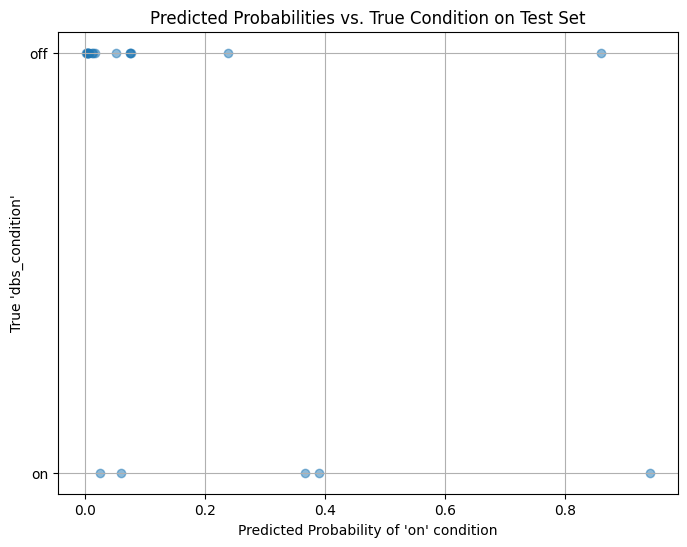

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(grid_search.best_estimator_.predict_proba(X_test_processed)[:, 1], y_test, alpha=0.5)
plt.xlabel("Predicted Probability of 'on' condition")
plt.ylabel("True 'dbs_condition'")
plt.title("Predicted Probabilities vs. True Condition on Test Set")
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_val_scaled = scaler.transform(X_val_processed)
X_test_scaled = scaler.transform(X_test_processed)


model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


y_train_numeric = (y_train == 'on').astype(int)
y_val_numeric = (y_val == 'on').astype(int)
y_test_numeric = (y_test == 'on').astype(int)


history = model_nn.fit(X_train_scaled, y_train_numeric,
                       validation_data=(X_val_scaled, y_val_numeric),
                       epochs=50,
                       batch_size=32,
                       verbose=0)

print("Neural Network model trained successfully.")


loss, accuracy = model_nn.evaluate(X_test_scaled, y_test_numeric, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


y_test_pred_prob = model_nn.predict(X_test_scaled)
y_test_pred_nn = (y_test_pred_prob > 0.5).astype(int)


y_test_pred_labels = np.where(y_test_pred_nn == 1, 'on', 'off')

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred_labels))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network model trained successfully.



Test Loss: 0.8396
Test Accuracy: 0.6667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Classification Report on Test Set:
              precision    recall  f1-score   support

         off       0.74      0.88      0.80        16
          on       0.00      0.00      0.00         5

    accuracy                           0.67        21
   macro avg       0.37      0.44      0.40        21
weighted avg       0.56      0.67      0.61        21



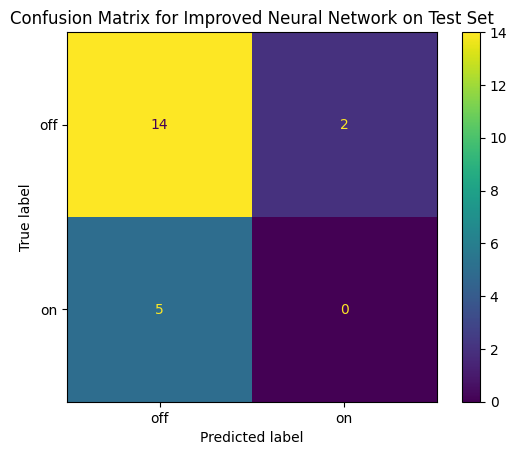


Classification Report for Improved Neural Network on Test Set:
              precision    recall  f1-score   support

         off       0.74      0.88      0.80        16
          on       0.00      0.00      0.00         5

    accuracy                           0.67        21
   macro avg       0.37      0.44      0.40        21
weighted avg       0.56      0.67      0.61        21



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_test_pred_labels_improved, labels=['off', 'on'])


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['off', 'on'])
disp.plot()
plt.title('Confusion Matrix for Improved Neural Network on Test Set')
plt.show()


print("\nClassification Report for Improved Neural Network on Test Set:")
print(classification_report(y_test, y_test_pred_labels_improved))